In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
from keras.datasets import cifar10
from keras.models import Sequential, Model
from keras.layers import Input, Dense, LeakyReLU, BatchNormalization, ReLU
from keras.layers import Conv2D, Conv2DTranspose, Reshape, Flatten
from keras.optimizers import Adam
from keras import initializers
from keras.utils import plot_model, np_utils
from keras import backend as K

Using TensorFlow backend.


ابتدا داده ها را می خوانیم 

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


در این قسمت داده ها را به اعداد بین منفی یک و یک اسکیل می کنیم 

In [6]:
X_train = np.float32(X_train)
X_train = (X_train / 255 - 0.5) * 2
X_train = np.clip(X_train, -1, 1)

X_test = np.float32(X_test)
X_test = (X_train / 255 - 0.5) * 2
X_test = np.clip(X_test, -1, 1)

در این قسمت می خواهیم generator را ایجاد کنیم 

یک لایه ورودی از بعد 100 میگیرد و آن لایه را به فضای های با ابعاد مختلف می برد 
که در هر لایه مشخص شده است و در نهایت یک عکس با ابعاد 
32 * 32 * 3 تولید می شود.

In [7]:
init = initializers.RandomNormal(stddev=0.02)

# Generator network
generator = Sequential()
generator.add(Dense(2*2*512, input_shape=(100,), kernel_initializer=init))
generator.add(Reshape((2, 2, 512)))
generator.add(BatchNormalization())
generator.add(LeakyReLU(0.2))
generator.add(Conv2DTranspose(256, kernel_size=5, strides=2, padding='same'))
generator.add(BatchNormalization())
generator.add(LeakyReLU(0.2))
generator.add(Conv2DTranspose(128, kernel_size=5, strides=2, padding='same'))
generator.add(BatchNormalization())
generator.add(LeakyReLU(0.2))
generator.add(Conv2DTranspose(64, kernel_size=5, strides=2, padding='same'))
generator.add(BatchNormalization())
generator.add(LeakyReLU(0.2))
generator.add(Conv2DTranspose(3, kernel_size=5, strides=2, padding='same',activation='tanh'))

لایه های جنریتور به صورت زیر هستند 

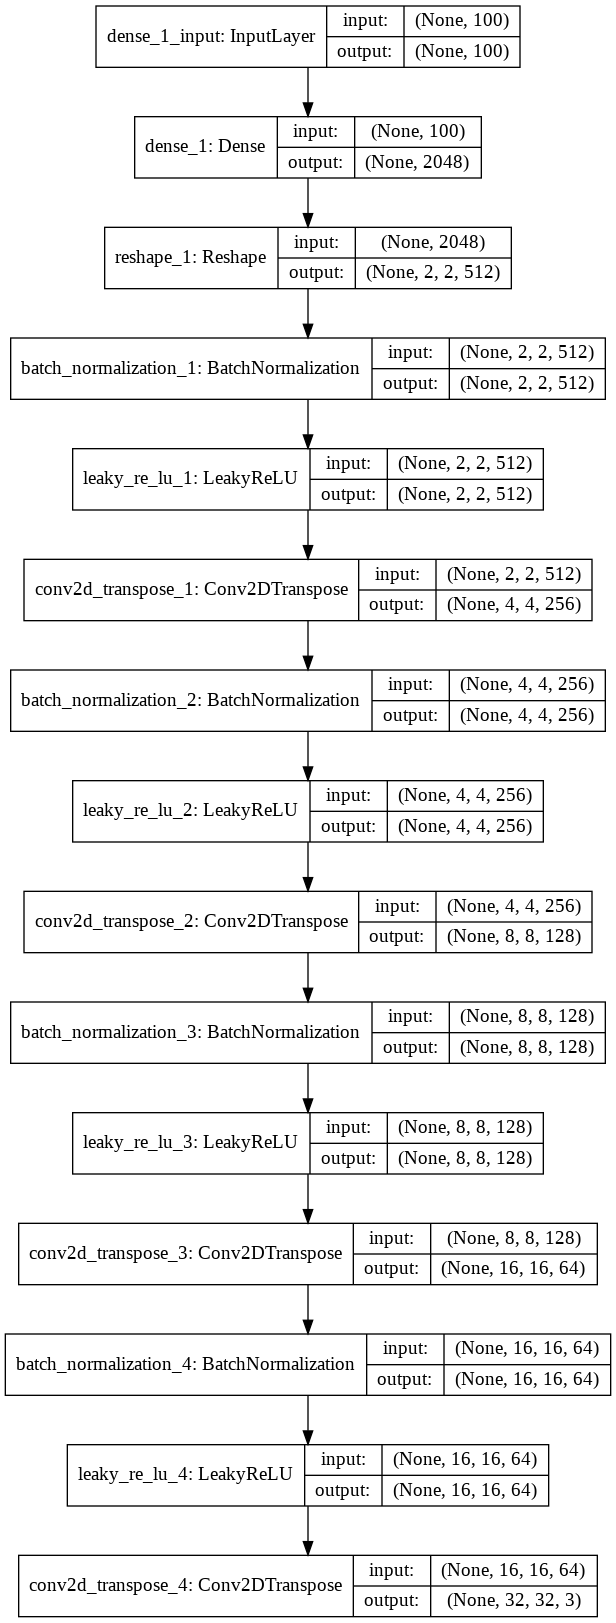

In [12]:
plot_model(generator, show_shapes=True)

در این قسمت دیسکریمینیتور
تعریف می کنیم که از چند لایه کانولوشنی تشکیل شده است که در نهایت یکلایه فولی کانکتد داردکه خروجی را تولید می کند و می گوید عکس ورودی واقعی یا جعلی است .

In [13]:
# Discriminator network
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, padding='same',input_shape=(X_train[0].shape), kernel_initializer=init))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding='same'))
discriminator.add(BatchNormalization())
discriminator.add(LeakyReLU(0.2))
discriminator.add(Conv2D(256, kernel_size=5, strides=2, padding='same'))
discriminator.add(BatchNormalization())
discriminator.add(LeakyReLU(0.2))
discriminator.add(Conv2D(512, kernel_size=5, strides=2, padding='same'))
discriminator.add(BatchNormalization())
discriminator.add(LeakyReLU(0.2))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(Adam(lr=0.0003, beta_1=0.5), loss='binary_crossentropy',metrics=['binary_accuracy'])

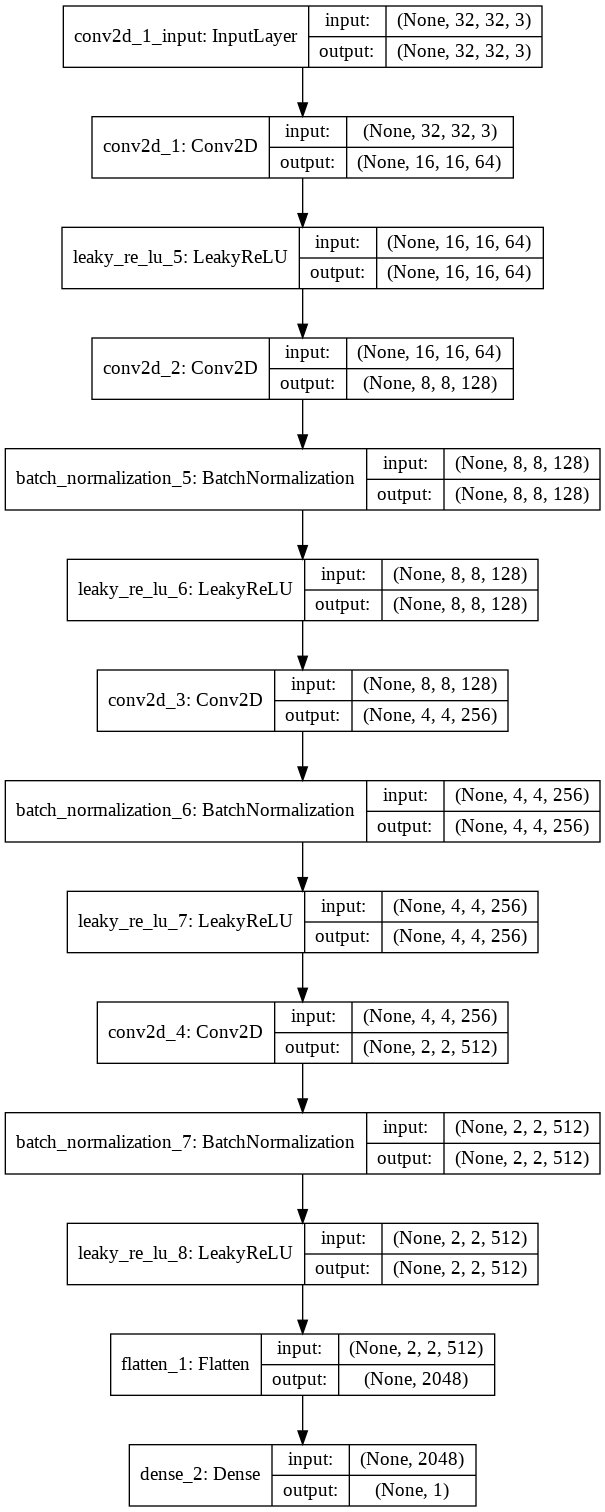

In [14]:
plot_model(discriminator, show_shapes=True)

در این قمست مدل نهایی که از دیسکریمینیتور و جنرتور تشکیل شده است 

In [ ]:
discriminator.trainable = False
z = Input(shape=(100,))
img = generator(z)
decision = discriminator(img)
GAN = Model(inputs=z, outputs=decision)
GAN.compile(Adam(lr=0.0004, beta_1=0.5), loss='binary_crossentropy',metrics=['binary_accuracy'])

ابتدا لازم است تا دیسکریمینیتور را روی داده های واقعی آموزش داده تا داده های واقعی را تشخیص دهند برای خروجی هم به جای یک مقدار کمتر از یک مثلا 0.9 را می دهیم تا خروجی نرم تر باشد . سپس به سراغ جنریتور می رویم و ابتدا به اندازه بچ داده رندوم تولید نموده و به جنریتور می دهیم تا برای ما تصاویر جعلی تولید کند سپس این تصاویر جعلی را به دیسکریمینیتور میدهیم تا بتواند داده های جعلی را آموزش ببیند سپس نوبت به آموزش جنریتور می رسد بدین منظور بخش آموزش دیکریمینیتور را غیر فعال نموده و جنریتور را آموزش می دهیم . سپس در هر ایپاک لاس ها را ذخیره نموده تا در نهایت نمودار آن را رسم کنیم . برای لاس مربوط به دیسکریمینتور هم میانگین لاس مربوط به آموزش داده های واقعی و جعلی را در نظر می گیریم .

epoch = 1/51


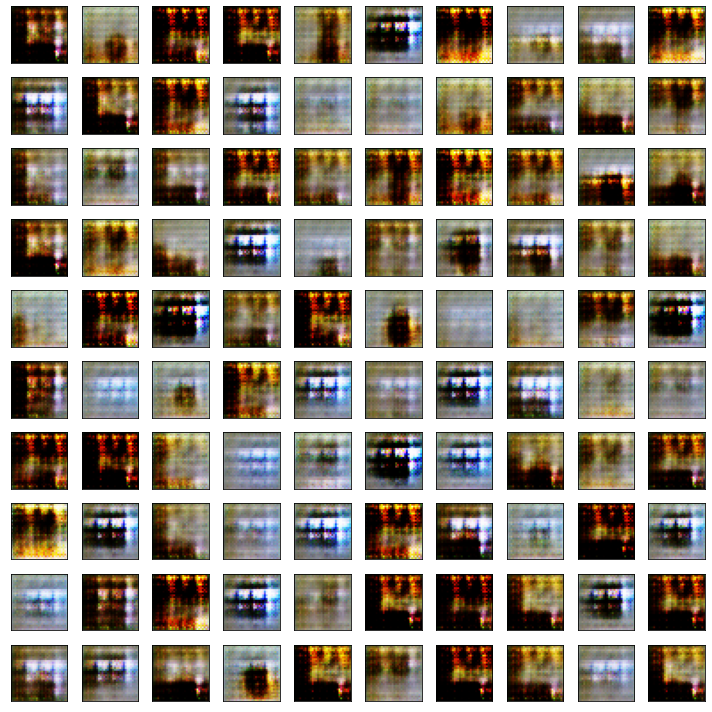

epoch = 2/51
epoch = 3/51
epoch = 4/51
epoch = 5/51
epoch = 6/51
epoch = 7/51
epoch = 8/51
epoch = 9/51
epoch = 10/51
epoch = 11/51


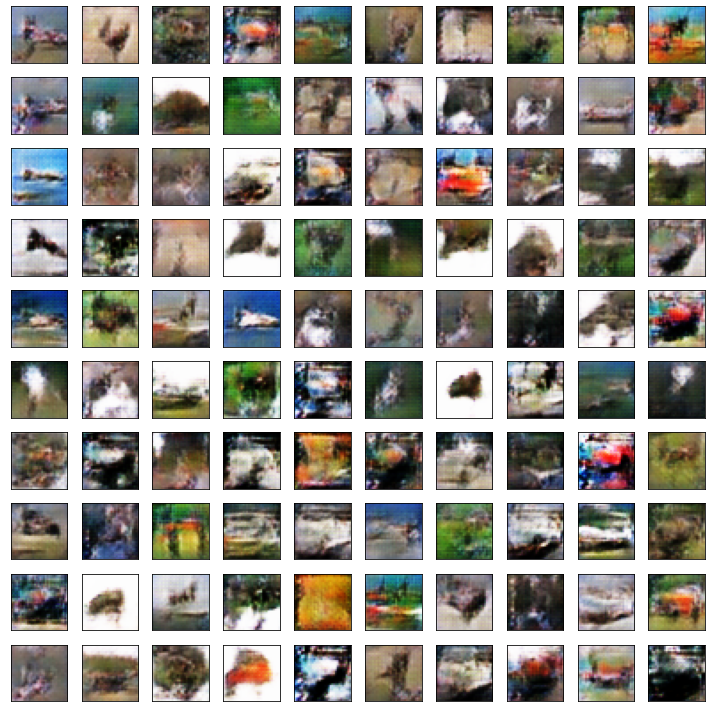

epoch = 12/51
epoch = 13/51
epoch = 14/51
epoch = 15/51
epoch = 16/51
epoch = 17/51
epoch = 18/51
epoch = 19/51
epoch = 20/51
epoch = 21/51


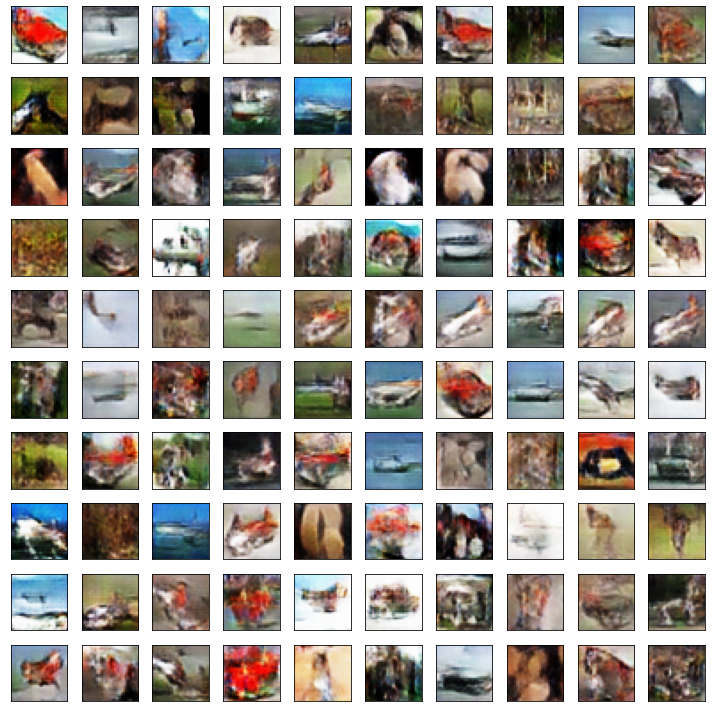

epoch = 22/51
epoch = 23/51
epoch = 24/51
epoch = 25/51
epoch = 26/51
epoch = 27/51
epoch = 28/51
epoch = 29/51
epoch = 30/51
epoch = 31/51


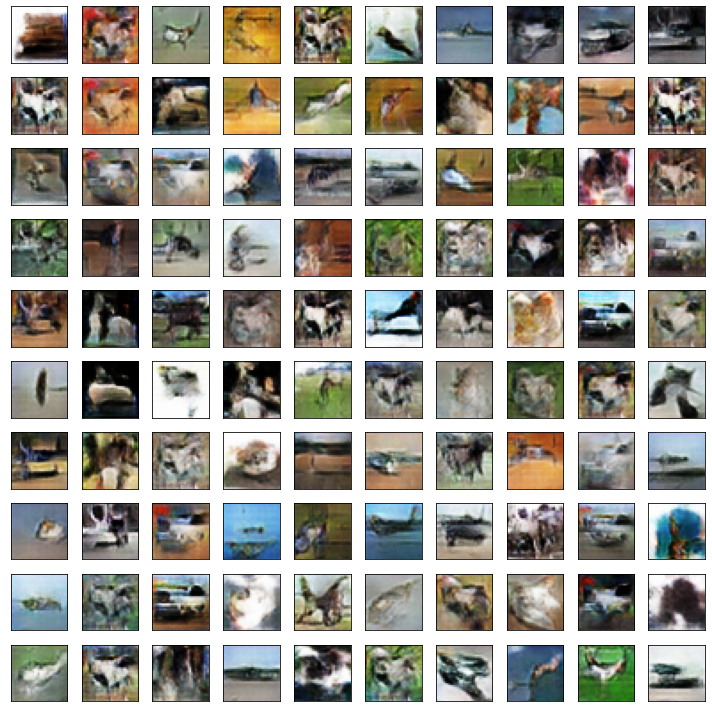

epoch = 32/51
epoch = 33/51
epoch = 34/51
epoch = 35/51
epoch = 36/51
epoch = 37/51
epoch = 38/51
epoch = 39/51
epoch = 40/51
epoch = 41/51


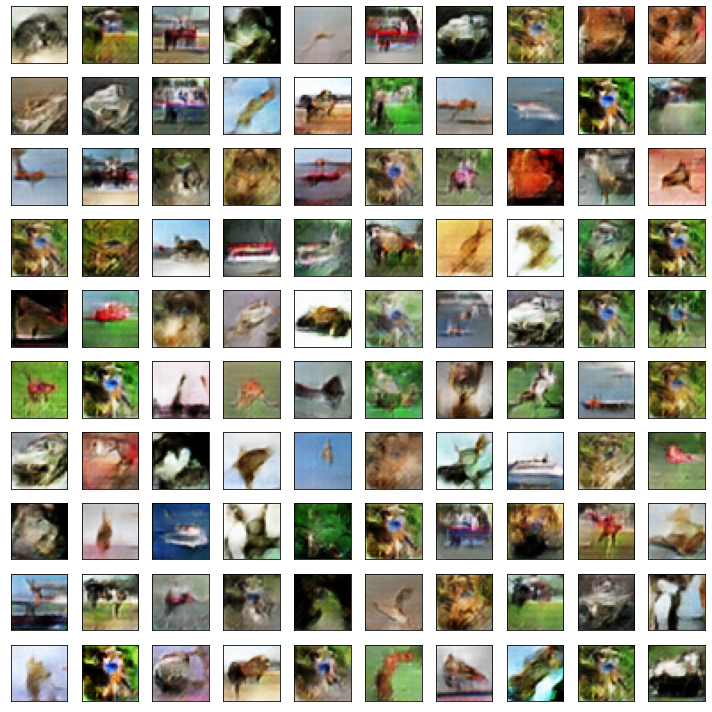

epoch = 42/51
epoch = 43/51
epoch = 44/51
epoch = 45/51
epoch = 46/51
epoch = 47/51
epoch = 48/51
epoch = 49/51
epoch = 50/51
epoch = 51/51


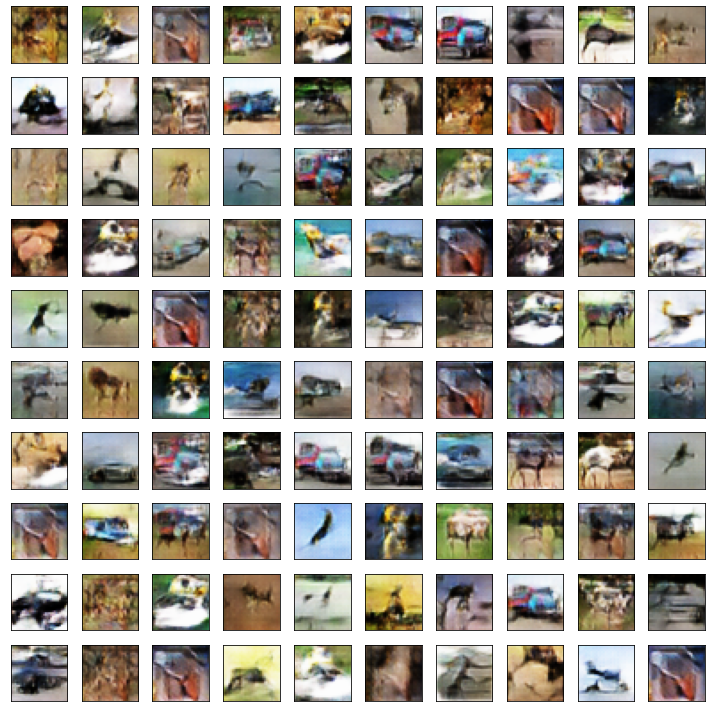

In [ ]:
epochs = 51
batch_size = 32
y_real = np.ones(shape=(batch_size, 1))
y_fake = np.zeros(shape=(batch_size, 1))
d_loss = []
g_loss = []

for e in range(epochs):
    for i in range(len(X_train) // batch_size):
        # discriminator learn real
        discriminator.trainable = True
        X_batch = X_train[i*batch_size:(i+1)*batch_size]
        d_loss_real = discriminator.train_on_batch(x=X_batch,y=y_real*0.9)
        #produce random number
        z = np.random.normal(loc=0, scale=1, size=(batch_size, 100))
        #generator generates fake
        X_fake = generator.predict_on_batch(z)
        #discriminator learn fake
        d_loss_fake = discriminator.train_on_batch(x=X_fake, y=y_fake)
        #mean of fake and real loss
        d_loss_batch = 0.5 * (d_loss_real[0] + d_loss_fake[0])
        discriminator.trainable = False
        #train generator
        g_loss_batch = GAN.train_on_batch(x=z, y=y_real)

    d_loss.append(d_loss_batch)
    g_loss.append(g_loss_batch[0])
    print('epoch = %d/%d' % (e + 1, epochs))

    #plot 10x10 pictures 
    if e % 10 == 0:
        samples = 100
        x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, 100)))
        
        fig = plt.figure(figsize=(10,10))
        for k in range(samples):
            plt.subplot(10,10, k + 1, xticks=[], yticks=[])
            plt.imshow(((x_fake[k] + 1)* 127).astype(np.uint8))
        plt.tight_layout()
        plt.show()

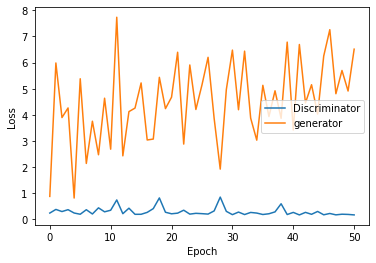

In [ ]:
plt.plot(d_loss)
plt.plot(g_loss)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Discriminator', 'generator'], loc='center right')
plt.show()